# Importing | Visualizing | Testing

In [1]:
# Import necessary libraries

import numpy as np
from keras.datasets import fashion_mnist

In [2]:
# This will load our Fashion_MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# We will explore the data set here
# We will also check the shape and size of different loads

print("Number of samples in training data: " + str(len(x_train)))
print("Number of labels in training data: " + str(len(y_train)))
print("Dimensions of single image in our x-train data: " + str(x_train[0].shape))
print("------------------------------------------------------------------------")
print("Number of samples in test data: " + str(len(x_test)))
print("Number of labels in test data: " + str(len(y_test)))
print("Dimensions of single image in our x-test data: " + str(x_test[0].shape))

Number of samples in training data: 60000
Number of labels in training data: 60000
Dimensions of single image in our x-train data: (28, 28)
------------------------------------------------------------------------
Number of samples in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in our x-test data: (28, 28)


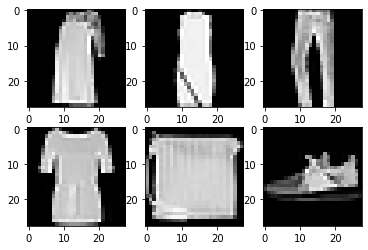

In [5]:
# This is how we are gonna visualize images within the matplotlib library
import matplotlib.pyplot as plt

# We will plot 5 images - Subplot arguments will represent nrows and ncols plus the index
# We will be using a grey color map since our image set is grayscale

plt.subplot(231)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(236)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

# Step 1: Creating CNN Our Model

In [6]:
# Importing needed libraries 
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Here we will settle parameters and batch sizes plus our epochs
batch_size = 128
epochs = 150 # One of these is a forwards and backwards pass through the CNN which is why we divide it 100 times, which can make it more accurate

# Need to store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

''' We will be adding a 4th dimension to allow our Keras to get the data in the right 'shape'.
Our shape image will go from the (60000, 28, 28) to (60000, 28, 28, 1)'''

# The reason we use 1 as our channel is because the images we are using are grayscale
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# This will store the shape of a single image
input_shape = (img_rows, img_cols, 1)

# This will change the image type to the float32 data-type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# We will normalize the data by changing the range from (0 - 255) to (0 - 1)
x_train /= 255
x_test /= 255

# This will perform our hot encoding 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# This will calculate the number of classes and number of pixels
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# We are now creating a CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [7]:
model_fitting = model.fit(x_train, y_train,
                          batch_size = batch_size, # 128 images per batch
                          epochs = epochs, # More time to take to train the model
                          verbose = 1, # How much information we wanna see. . . 1->will show us the progress bar
                          validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Epoch 1/150
469/469 [==============================] - 39s 83ms/step - loss: 2.4576 - accuracy: 0.2828 - val_loss: 1.4766 - val_accuracy: 0.5249
Epoch 2/150
469/469 [==============================] - 38s 82ms/step - loss: 1.4828 - accuracy: 0.5193 - val_loss: 0.8218 - val_accuracy: 0.7230
Epoch 3/150
469/469 [==============================] - 39s 82ms/step - loss: 1.1839 - accuracy: 0.6102 - val_loss: 0.7218 - val_accuracy: 0.7518
Epoch 4/150
469/469 [==============================] - 39s 82ms/step - loss: 1.0383 - accuracy: 0.6558 - val_loss: 0.6658 - val_accuracy: 0.7690
Epoch 5/150
469/469 [==============================] - 39s 82ms/step - loss: 0.9562 - accuracy: 0.6815 - val_loss: 0.6268 - val_accuracy: 0.7801
Epoch 6/150
469/469 [==============================] - 39s 83ms/step - loss: 0.8871 - accuracy: 0.7051 - val_loss: 0.5972 - val_accuracy: 0.7907
Epoch 7/150
469/469 [==============================] - 39s 83ms/step - loss: 0.8451 - accuracy: 0.7164 - val_loss: 0.5741 - val_ac

In [ ]:
model.save('image_classification_model.h5')

In [ ]:
import tensorflow as tf
from keras.models import load_model

def load_image(filename):
    # Load the image
    img = tf.keras.utils.load_img(filename, grayscale=True, target_size=(28, 28))
    
    # Converting the image to array
    img = tf.keras.utils.img_to_array(img)
    
    # Reshape the image into a sample of 1 channel
    img = img.reshape(1, 28, 28, 1)
    
    # Prepare this as pixel data
    img = img.astype('float32')
    img = img / 255.0